<a href="https://colab.research.google.com/github/ehpub/KFQ_DL_2023-/blob/main/2023_kfq_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9D%BC%EB%B0%98%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

In [67]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),_ = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = x_train.reshape(-1,784)
x_train.shape

(60000, 784)

In [5]:
x_train=x_train/255.0

In [6]:
x_train.max(), x_train.min()

(1.0, 0.0)

In [7]:
rn = np.random.random((len(x_train),784))
zn = np.zeros((len(x_train),784))

In [8]:
rn.shape, zn.shape

((60000, 784), (60000, 784))

In [9]:
x_train2 = np.concatenate([x_train,rn] ,axis=1)
x_train2.shape

(60000, 1568)

In [10]:
x_train3 = np.concatenate([x_train,zn] ,axis=1)
x_train3.shape

(60000, 1568)

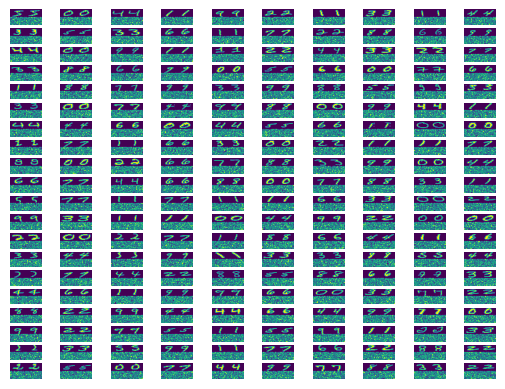

In [18]:
tx_train = x_train2.reshape(-1,28,56)
fig,axs = plt.subplots(ncols=10,nrows=20)
for r in range(20):
  for c in range(10):
    axs[r][c].imshow(tx_train[r*10+c])
    axs[r][c].axis('off')
    pass
plt.show()


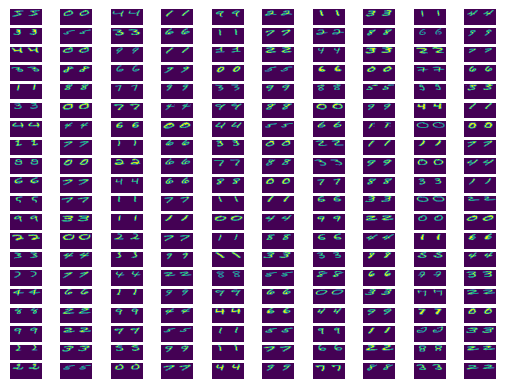

In [19]:
tx_train = x_train3.reshape(-1,28,56)
fig,axs = plt.subplots(ncols=10,nrows=20)
for r in range(20):
  for c in range(10):
    axs[r][c].imshow(tx_train[r*10+c])
    axs[r][c].axis('off')
    pass
plt.show()

In [13]:
def get_model():
  model = models.Sequential()
  model.add(layers.Dense(512,activation='relu'))
  model.add(layers.Dense(10,activation='softmax'))
  model.compile(optimizer='rmsprop',
                loss=keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])
  return model

In [14]:
model = get_model()
hist1 = model.fit(x_train2,y_train,epochs=10,validation_split=0.2)
print("----------------------------------")
model = get_model()
hist2 = model.fit(x_train3,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.4219 - accuracy: 0.8680 - val_loss: 0.2205 - val_accuracy: 0.9350
Epoch 2/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1846 - accuracy: 0.9444 - val_loss: 0.1834 - val_accuracy: 0.9463
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1247 - accuracy: 0.9625 - val_loss: 0.1672 - val_accuracy: 0.9528
Epoch 4/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0903 - accuracy: 0.9716 - val_loss: 0.1877 - val_accuracy: 0.9530
Epoch 5/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0694 - accuracy: 0.9775 - val_loss: 0.1659 - val_accuracy: 0.9600
Epoch 6/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0544 - accuracy: 0.9832 - val_loss: 0.1770 - val_accuracy: 0.9624
Epoch 7/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0427 - accuracy: 0.9861 - val_loss: 0.1890 -

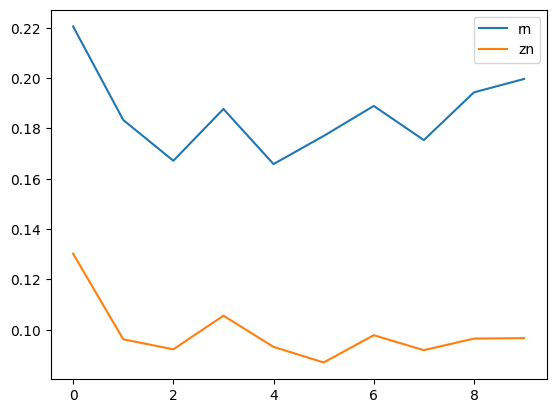

In [15]:
plt.plot(hist1.history['val_loss'],label='rn')
plt.plot(hist2.history['val_loss'],label='zn')
#plt.plot(hist1.history['loss'],label='rn loss')
#plt.plot(hist2.history['loss'],label='zn loss')
plt.legend()
plt.show()

In [16]:
model = get_model()
hist3 = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2231 - accuracy: 0.9341 - val_loss: 0.1210 - val_accuracy: 0.9647
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0934 - accuracy: 0.9715 - val_loss: 0.1023 - val_accuracy: 0.9704
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0633 - accuracy: 0.9810 - val_loss: 0.0946 - val_accuracy: 0.9743
Epoch 4/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0473 - accuracy: 0.9859 - val_loss: 0.0904 - val_accuracy: 0.9761
Epoch 5/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0348 - accuracy: 0.9898 - val_loss: 0.0965 - val_accuracy: 0.9770
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0268 - accuracy: 0.9919 - val_loss: 0.0919 - val_accuracy: 0.9775
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0895 - val_a

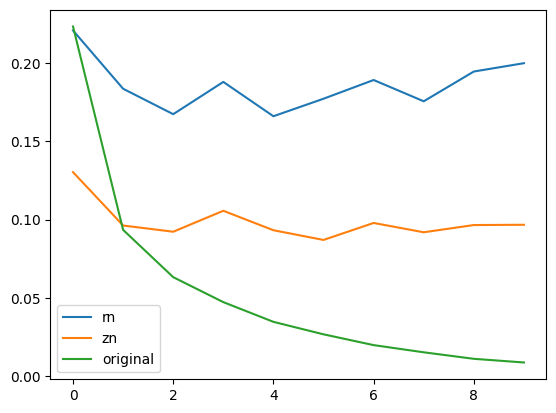

In [17]:
plt.plot(hist1.history['val_loss'],label='rn')
plt.plot(hist2.history['val_loss'],label='zn')
plt.plot(hist3.history['loss'],label='original')

plt.legend()
plt.show()

In [36]:
(x_train,y_train),_ = mnist.load_data()

In [37]:
x_train = x_train.reshape((-1,784))
x_train = x_train/255.0
x_train = x_train.astype('float32')

In [38]:
print(y_train)

[5 0 4 ... 5 6 8]


In [26]:
ry_train = y_train.copy()
np.random.shuffle(ry_train)
print(y_train)
print(ry_train)

[5 0 4 ... 5 6 8]
[6 4 4 ... 0 2 6]


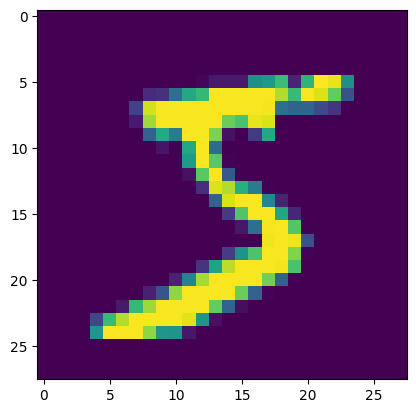

6


In [28]:
plt.imshow(x_train[0].reshape(28,28))
plt.show()
print(ry_train[0])

In [30]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
hist = model.fit(x_train,y_train,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 6s 15ms/step - loss: 2.3132 - accuracy: 0.1059 - val_loss: 2.3036 - val_accuracy: 0.1014
Epoch 2/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2986 - accuracy: 0.1187 - val_loss: 2.3054 - val_accuracy: 0.1068
Epoch 3/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2927 - accuracy: 0.1246 - val_loss: 2.3167 - val_accuracy: 0.0999
Epoch 4/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2846 - accuracy: 0.1320 - val_loss: 2.3156 - val_accuracy: 0.1056
Epoch 5/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2698 - accuracy: 0.1471 - val_loss: 2.3263 - val_accuracy: 0.1032
Epoch 6/100
375/375 [==============================] - 5s 14ms/step - loss: 2.2523 - accuracy: 0.1584 - val_loss: 2.3399 - val_accuracy: 0.0990
Epoch 7/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2291 - accuracy: 0.1754 - val_loss: 2.3522 - val_accuracy:

In [39]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

of = keras.optimizers.Adam(learning_rate=1.0)
model.compile(optimizer=of,
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
hist1 = model.fit(x_train,y_train,
          epochs=50,
          batch_size=128,
          validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 6s 15ms/step - loss: 161.9414 - accuracy: 0.2811 - val_loss: 2.0442 - val_accuracy: 0.2492
Epoch 2/50
375/375 [==============================] - 4s 11ms/step - loss: 2.1920 - accuracy: 0.2223 - val_loss: 2.6491 - val_accuracy: 0.2082
Epoch 3/50
375/375 [==============================] - 5s 12ms/step - loss: 2.2896 - accuracy: 0.1572 - val_loss: 2.3200 - val_accuracy: 0.1356
Epoch 4/50
375/375 [==============================] - 5s 14ms/step - loss: 2.3437 - accuracy: 0.1369 - val_loss: 2.4155 - val_accuracy: 0.1208
Epoch 5/50
375/375 [==============================] - 4s 11ms/step - loss: 2.4290 - accuracy: 0.1254 - val_loss: 2.3345 - val_accuracy: 0.1130
Epoch 6/50
375/375 [==============================] - 5s 12ms/step - loss: 2.3794 - accuracy: 0.1162 - val_loss: 2.2744 - val_accuracy: 0.1248
Epoch 7/50
375/375 [==============================] - 5s 14ms/step - loss: 2.3124 - accuracy: 0.1178 - val_loss: 2.3369 - val_accuracy: 0.12

In [42]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

of = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=of,
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
hist2 = model.fit(x_train,y_train,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 5s 12ms/step - loss: 0.3018 - accuracy: 0.9146 - val_loss: 0.1626 - val_accuracy: 0.9548
Epoch 2/20
375/375 [==============================] - 9s 24ms/step - loss: 0.1249 - accuracy: 0.9642 - val_loss: 0.1122 - val_accuracy: 0.9662
Epoch 3/20
375/375 [==============================] - 9s 24ms/step - loss: 0.0825 - accuracy: 0.9761 - val_loss: 0.0963 - val_accuracy: 0.9718
Epoch 4/20
375/375 [==============================] - 9s 24ms/step - loss: 0.0581 - accuracy: 0.9836 - val_loss: 0.0815 - val_accuracy: 0.9745
Epoch 5/20
375/375 [==============================] - 9s 23ms/step - loss: 0.0427 - accuracy: 0.9877 - val_loss: 0.0837 - val_accuracy: 0.9748
Epoch 6/20
375/375 [==============================] - 9s 25ms/step - loss: 0.0319 - accuracy: 0.9909 - val_loss: 0.0790 - val_accuracy: 0.9762
Epoch 7/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0234 - accuracy: 0.9942 - val_loss: 0.0819 - val_accuracy: 0.9754

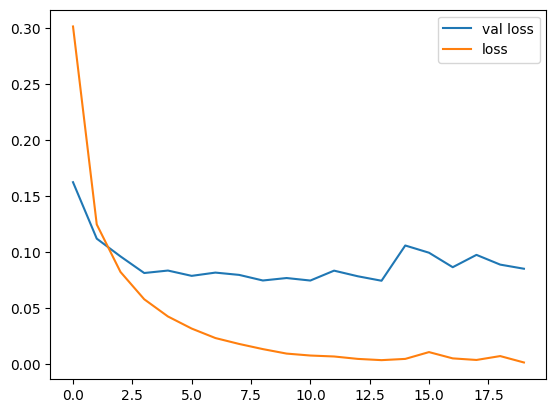

In [43]:
plt.plot(hist2.history['val_loss'],label = 'val loss')
plt.plot(hist2.history['loss'],label = 'loss')
plt.legend()
plt.show()

In [41]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

of = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=of,
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
hist2 = model.fit(x_train,y_train,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 8s 20ms/step - loss: 0.2337 - accuracy: 0.9304 - val_loss: 0.1538 - val_accuracy: 0.9547
Epoch 2/20
375/375 [==============================] - 4s 11ms/step - loss: 0.1142 - accuracy: 0.9658 - val_loss: 0.1433 - val_accuracy: 0.9616
Epoch 3/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0862 - accuracy: 0.9741 - val_loss: 0.1239 - val_accuracy: 0.9654
Epoch 4/20
375/375 [==============================] - 5s 12ms/step - loss: 0.0730 - accuracy: 0.9779 - val_loss: 0.1573 - val_accuracy: 0.9627
Epoch 5/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0722 - accuracy: 0.9798 - val_loss: 0.1640 - val_accuracy: 0.9659
Epoch 6/20
375/375 [==============================] - 5s 14ms/step - loss: 0.0609 - accuracy: 0.9823 - val_loss: 0.1517 - val_accuracy: 0.9700
Epoch 7/20
375/375 [==============================] - 4s 11ms/step - loss: 0.0526 - accuracy: 0.9851 - val_loss: 0.1615 - val_accuracy: 0.9678

In [44]:
model = models.Sequential()
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
hist = model.fit(x_train,y_train,
          epochs=20,
          batch_size=128,
          validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.7714 - accuracy: 0.8076 - val_loss: 0.4118 - val_accuracy: 0.8968
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3919 - accuracy: 0.8956 - val_loss: 0.3352 - val_accuracy: 0.9094
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.9075 - val_loss: 0.3078 - val_accuracy: 0.9159
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3149 - accuracy: 0.9135 - val_loss: 0.2936 - val_accuracy: 0.9172
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3010 - accuracy: 0.9162 - val_loss: 0.2840 - val_accuracy: 0.9216
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2906 - accuracy: 0.9190 - val_loss: 0.2784 - val_accuracy: 0.9224
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2835 - accuracy: 0.9209 - val_loss: 0.2747 - val_accuracy: 0.9230
Epoch 

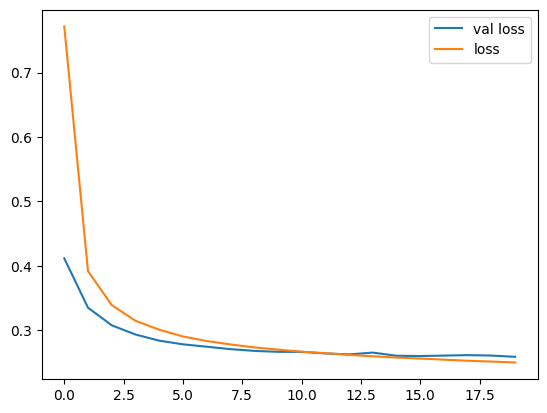

In [45]:
plt.plot(hist.history['val_loss'],label = 'val loss')
plt.plot(hist.history['loss'],label = 'loss')
plt.legend()
plt.show()

In [46]:
model = models.Sequential()
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
hist = model.fit(x_train,y_train,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 6ms/step - loss: 0.7561 - accuracy: 0.8144 - val_loss: 0.4105 - val_accuracy: 0.8961
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3901 - accuracy: 0.8975 - val_loss: 0.3358 - val_accuracy: 0.9086
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3387 - accuracy: 0.9074 - val_loss: 0.3080 - val_accuracy: 0.9140
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3149 - accuracy: 0.9136 - val_loss: 0.2926 - val_accuracy: 0.9195
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3003 - accuracy: 0.9163 - val_loss: 0.2858 - val_accuracy: 0.9198
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2907 - accuracy: 0.9192 - val_loss: 0.2783 - val_accuracy: 0.9227
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2837 - accuracy: 0.9205 - val_loss: 0.2744 - val_accuracy: 0.9242

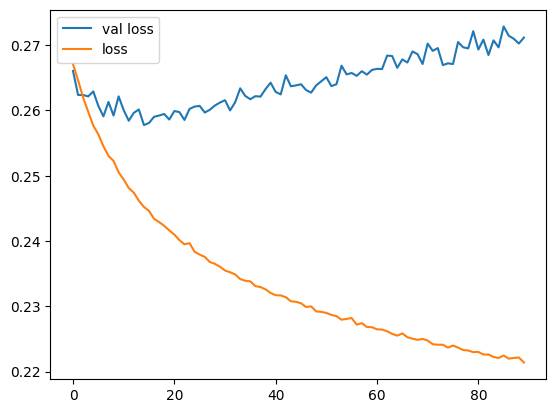

In [48]:
plt.plot(hist.history['val_loss'][10:],label = 'val loss')
plt.plot(hist.history['loss'][10:],label = 'loss')
plt.legend()
plt.show()

In [49]:
model = models.Sequential()
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
hist2 = model.fit(x_train,y_train,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 4s 7ms/step - loss: 0.3736 - accuracy: 0.8954 - val_loss: 0.1858 - val_accuracy: 0.9451
Epoch 2/100
375/375 [==============================] - 2s 7ms/step - loss: 0.1550 - accuracy: 0.9547 - val_loss: 0.1312 - val_accuracy: 0.9618
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1107 - accuracy: 0.9665 - val_loss: 0.1215 - val_accuracy: 0.9629
Epoch 4/100
375/375 [==============================] - 3s 9ms/step - loss: 0.0830 - accuracy: 0.9754 - val_loss: 0.1118 - val_accuracy: 0.9653
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0681 - accuracy: 0.9789 - val_loss: 0.0956 - val_accuracy: 0.9715
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0539 - accuracy: 0.9837 - val_loss: 0.0931 - val_accuracy: 0.9728
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.1004 - val_accuracy: 0.9718

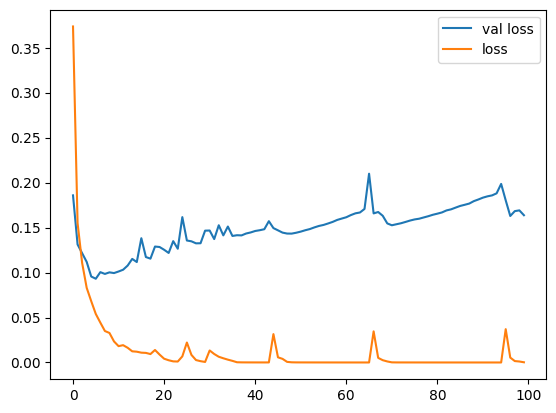

In [51]:
plt.plot(hist2.history['val_loss'],label = 'val loss')
plt.plot(hist2.history['loss'],label = 'loss')
plt.legend()
plt.show()

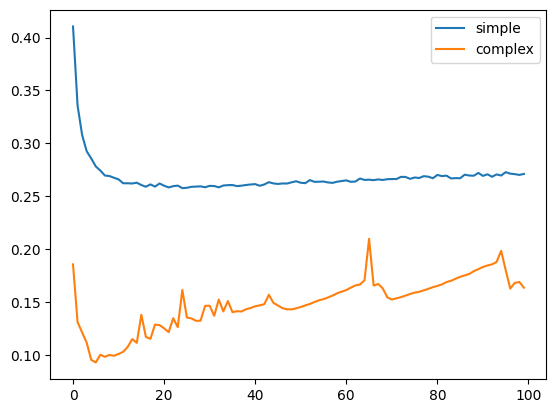

In [52]:
plt.plot(hist.history['val_loss'],label = 'simple')
plt.plot(hist2.history['val_loss'],label = 'complex')
plt.legend()
plt.show()

In [70]:
from keras.datasets import imdb
(x_train,y_train),_ = imdb.load_data(num_words=10000)

In [71]:
def count_verfctorize(sequences,dimentsion=10000):
  results = np.zeros((len(sequences),dimentsion))
  for i, seq in enumerate(sequences):
    results[i,seq] +=1.
  return results

In [72]:
x_train = count_verfctorize(x_train)
x_train.shape

(25000, 10000)

In [59]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss = keras.losses.binary_crossentropy,
              metrics=['accuracy'])
hist = model.fit(x_train,y_train,
                 epochs=20,
                 batch_size=512,
                 validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 6s 134ms/step - loss: 0.5362 - accuracy: 0.7779 - val_loss: 0.4139 - val_accuracy: 0.8519
Epoch 2/20
30/30 [==============================] - 2s 79ms/step - loss: 0.3358 - accuracy: 0.8916 - val_loss: 0.3182 - val_accuracy: 0.8837
Epoch 3/20
30/30 [==============================] - 2s 80ms/step - loss: 0.2508 - accuracy: 0.9173 - val_loss: 0.2864 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2020 - accuracy: 0.9325 - val_loss: 0.2743 - val_accuracy: 0.8925
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1673 - accuracy: 0.9441 - val_loss: 0.2911 - val_accuracy: 0.8793
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1442 - accuracy: 0.9535 - val_loss: 0.2832 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1236 - accuracy: 0.9622 - val_loss: 0.2933 - val_accuracy: 0.8865
Epoch 8/20
3

In [60]:
model = models.Sequential()
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss = keras.losses.binary_crossentropy,
              metrics=['accuracy'])
hist2 = model.fit(x_train,y_train,
                 epochs=20,
                 batch_size=512,
                 validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.6139 - accuracy: 0.7600 - val_loss: 0.5457 - val_accuracy: 0.8205
Epoch 2/20
30/30 [==============================] - 2s 62ms/step - loss: 0.4874 - accuracy: 0.8699 - val_loss: 0.4520 - val_accuracy: 0.8603
Epoch 3/20
30/30 [==============================] - 2s 78ms/step - loss: 0.3950 - accuracy: 0.8953 - val_loss: 0.3866 - val_accuracy: 0.8782
Epoch 4/20
30/30 [==============================] - 2s 63ms/step - loss: 0.3257 - accuracy: 0.9112 - val_loss: 0.3391 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2751 - accuracy: 0.9224 - val_loss: 0.3144 - val_accuracy: 0.8817
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2375 - accuracy: 0.9289 - val_loss: 0.2917 - val_accuracy: 0.8889
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2079 - accuracy: 0.9388 - val_loss: 0.2834 - val_accuracy: 0.8915
Epoch 8/20
30

In [61]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss = keras.losses.binary_crossentropy,
              metrics=['accuracy'])
hist3 = model.fit(x_train,y_train,
                 epochs=20,
                 batch_size=512,
                 validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 16s 522ms/step - loss: 0.5554 - accuracy: 0.7151 - val_loss: 0.6946 - val_accuracy: 0.6879
Epoch 2/20
30/30 [==============================] - 19s 644ms/step - loss: 0.3440 - accuracy: 0.8583 - val_loss: 0.2839 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 18s 593ms/step - loss: 0.2291 - accuracy: 0.9101 - val_loss: 0.2693 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 13s 425ms/step - loss: 0.1896 - accuracy: 0.9269 - val_loss: 0.2802 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 15s 513ms/step - loss: 0.1484 - accuracy: 0.9434 - val_loss: 0.2885 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 12s 415ms/step - loss: 0.0926 - accuracy: 0.9679 - val_loss: 0.4067 - val_accuracy: 0.8694
Epoch 7/20
30/30 [==============================] - 11s 369ms/step - loss: 0.0889 - accuracy: 0.9697 - val_loss: 0.3306 - val_accuracy: 0.8746

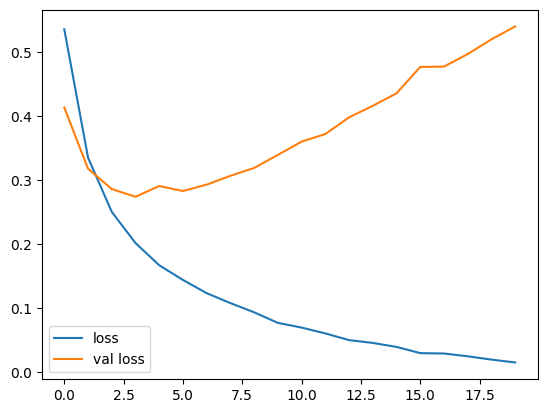

In [62]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()

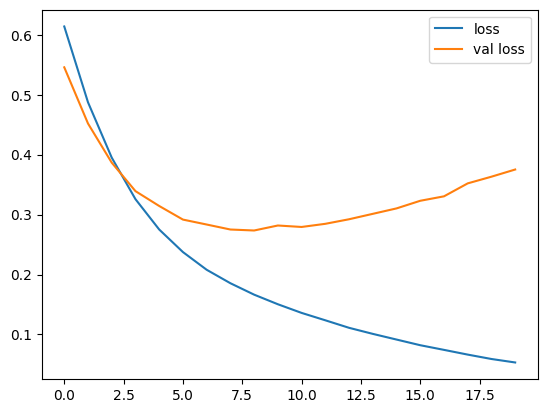

In [63]:
plt.plot(hist2.history['loss'],label='loss')
plt.plot(hist2.history['val_loss'],label='val loss')
plt.legend()
plt.show()

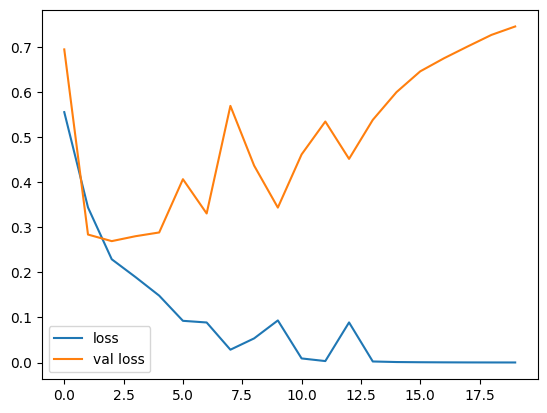

In [65]:
plt.plot(hist3.history['loss'],label='loss')
plt.plot(hist3.history['val_loss'],label='val loss')
plt.legend()
plt.show()

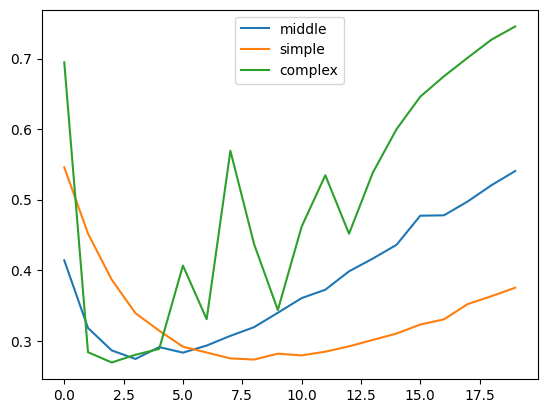

In [66]:
plt.plot(hist.history['val_loss'],label='middle')
plt.plot(hist2.history['val_loss'],label='simple')
plt.plot(hist3.history['val_loss'],label='complex')
plt.legend()
plt.show()

In [69]:
from keras import regularizers

In [78]:
model = models. Sequential()
model.add(layers.Dense(16,
                       kernel_regularizer=regularizers.l2(0.002),
                       activation='relu'))
model.add(layers.Dense(16,
                       kernel_regularizer=regularizers.l2(0.002),
                       activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
hist= model.fit(x_train,y_train,epochs=20,
                batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.6151 - accuracy: 0.7714 - val_loss: 0.4778 - val_accuracy: 0.8697
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4078 - accuracy: 0.8931 - val_loss: 0.4123 - val_accuracy: 0.8660
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.3337 - accuracy: 0.9121 - val_loss: 0.3631 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.2970 - accuracy: 0.9245 - val_loss: 0.3572 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2743 - accuracy: 0.9327 - val_loss: 0.3602 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2639 - accuracy: 0.9381 - val_loss: 0.3829 - val_accuracy: 0.8762
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2491 - accuracy: 0.9439 - val_loss: 0.4102 - val_accuracy: 0.8682
Epoch 8/20
30

In [79]:
model = models. Sequential()
model.add(layers.Dense(16,
                       activation='relu'))
model.add(layers.Dense(16,
                       activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
hist2= model.fit(x_train,y_train,epochs=20,
                batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 151ms/step - loss: 0.5229 - accuracy: 0.7711 - val_loss: 0.3944 - val_accuracy: 0.8553
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3178 - accuracy: 0.8938 - val_loss: 0.3053 - val_accuracy: 0.8845
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2372 - accuracy: 0.9206 - val_loss: 0.2809 - val_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1936 - accuracy: 0.9349 - val_loss: 0.2749 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1612 - accuracy: 0.9466 - val_loss: 0.2824 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1343 - accuracy: 0.9583 - val_loss: 0.3259 - val_accuracy: 0.8719
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1179 - accuracy: 0.9641 - val_loss: 0.2995 - val_accuracy: 0.8842
Epoch 8/20
3

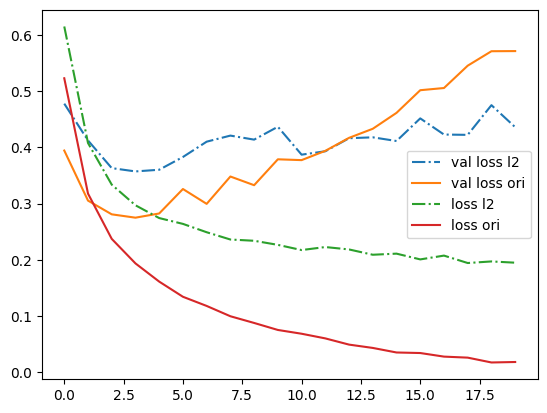

In [84]:
plt.plot(hist.history['val_loss'],'-.',label ='val loss l2')
plt.plot(hist2.history['val_loss'],label ='val loss ori')
plt.plot(hist.history['loss'],'-.',label ='loss l2')
plt.plot(hist2.history['loss'],label ='loss ori')
plt.legend()
plt.show()

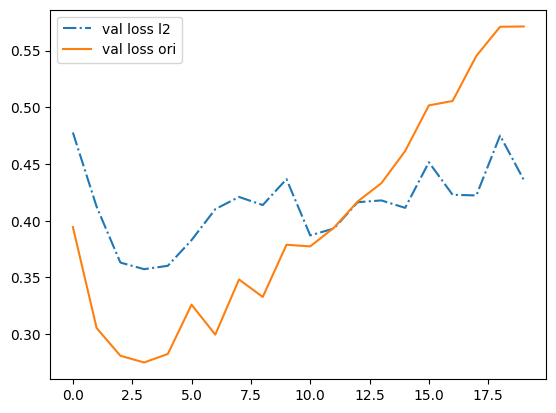

In [85]:
plt.plot(hist.history['val_loss'],'-.',label ='val loss l2')
plt.plot(hist2.history['val_loss'],label ='val loss ori')
plt.legend()
plt.show()

In [87]:
model = models. Sequential()
model.add(layers.Dense(16,
                       kernel_regularizer=regularizers.L1(0.002),
                       activation='relu'))
model.add(layers.Dense(16,
                       kernel_regularizer=regularizers.L1(0.002),
                       activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
hist3= model.fit(x_train,y_train,epochs=20,
                batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 90ms/step - loss: 1.5546 - accuracy: 0.7291 - val_loss: 0.8819 - val_accuracy: 0.7979
Epoch 2/20
30/30 [==============================] - 2s 62ms/step - loss: 0.8408 - accuracy: 0.8092 - val_loss: 0.8326 - val_accuracy: 0.8020
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.7892 - accuracy: 0.8293 - val_loss: 0.7787 - val_accuracy: 0.8378
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.7555 - accuracy: 0.8368 - val_loss: 0.7885 - val_accuracy: 0.8057
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.7363 - accuracy: 0.8350 - val_loss: 0.7409 - val_accuracy: 0.8360
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.7184 - accuracy: 0.8428 - val_loss: 0.7192 - val_accuracy: 0.8469
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.6995 - accuracy: 0.8484 - val_loss: 0.7132 - val_accuracy: 0.8406
Epoch 8/20
30

In [88]:
model = models. Sequential()
model.add(layers.Dense(16,
                       kernel_regularizer=regularizers.L1L2(l1=0.002,l2=0.002),
                       activation='relu'))
model.add(layers.Dense(16,
                       kernel_regularizer=regularizers.L1L2(l1=0.002,l2=0.002),
                       activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
hist4= model.fit(x_train,y_train,epochs=20,
                batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 88ms/step - loss: 1.5992 - accuracy: 0.6877 - val_loss: 0.9390 - val_accuracy: 0.7018
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.8936 - accuracy: 0.7895 - val_loss: 0.8778 - val_accuracy: 0.8008
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.8430 - accuracy: 0.8111 - val_loss: 0.8343 - val_accuracy: 0.8143
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.8036 - accuracy: 0.8222 - val_loss: 0.8124 - val_accuracy: 0.8188
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.7731 - accuracy: 0.8313 - val_loss: 0.8116 - val_accuracy: 0.7923
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.7572 - accuracy: 0.8281 - val_loss: 0.7576 - val_accuracy: 0.8394
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.7363 - accuracy: 0.8364 - val_loss: 0.7384 - val_accuracy: 0.8431
Epoch 8/20
30

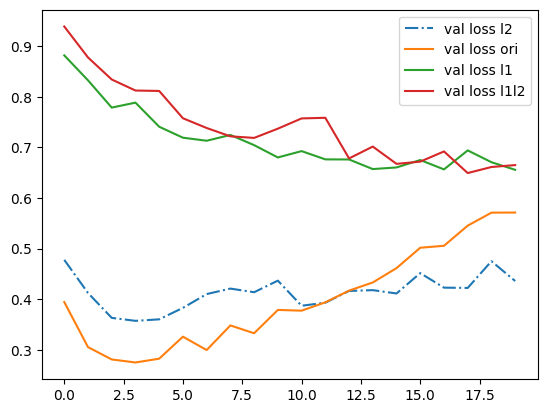

In [89]:
plt.plot(hist.history['val_loss'],'-.',label ='val loss l2')
plt.plot(hist2.history['val_loss'],label ='val loss ori')
plt.plot(hist3.history['val_loss'],label ='val loss l1')
plt.plot(hist4.history['val_loss'],label ='val loss l1l2')
plt.legend()
plt.show()

In [90]:
model = models. Sequential()
model.add(layers.Dense(16,
                       activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,
                       activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
hist5= model.fit(x_train,y_train,epochs=20,
                batch_size=512,validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 79ms/step - loss: 0.6459 - accuracy: 0.6093 - val_loss: 0.5714 - val_accuracy: 0.7020
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5506 - accuracy: 0.7402 - val_loss: 0.4954 - val_accuracy: 0.8716
Epoch 3/20
30/30 [==============================] - 2s 54ms/step - loss: 0.4788 - accuracy: 0.8249 - val_loss: 0.4475 - val_accuracy: 0.8324
Epoch 4/20
30/30 [==============================] - 2s 57ms/step - loss: 0.4289 - accuracy: 0.8704 - val_loss: 0.4039 - val_accuracy: 0.8684
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3905 - accuracy: 0.8943 - val_loss: 0.3776 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3533 - accuracy: 0.9115 - val_loss: 0.3603 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3283 - accuracy: 0.9219 - val_loss: 0.3359 - val_accuracy: 0.8879
Epoch 8/20
30

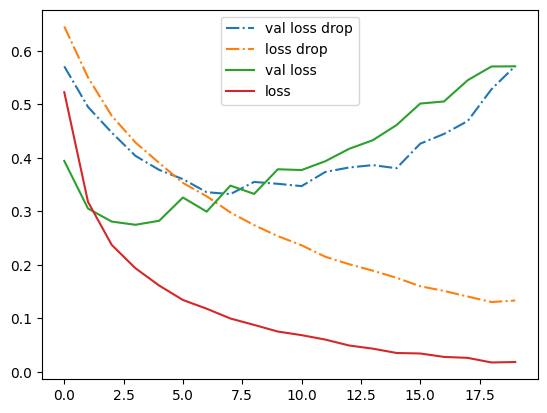

In [94]:
plt.plot(hist5.history['val_loss'],'-.',label ='val loss drop')
plt.plot(hist5.history['loss'],'-.',label ='loss drop')
plt.plot(hist2.history['val_loss'],label ='val loss')
plt.plot(hist2.history['loss'],label ='loss')
plt.legend()
plt.show()